# Plot mutation masking results

This notebook allows you to replicate Figure 3B/D, assuming you've sucessfully run the previous notebooks (1 to preprocess data and 2 to run inference for BALM-paired, BALM-shuffled, and BALM-unpaired).

In [1]:
import os
import sys

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import abutils

## load & format data

In [2]:
shuffled_files = abutils.io.list_files('./outputs/BALM-shuffled/')
paired_files = abutils.io.list_files('./outputs/BALM-paired/')

In [3]:
# rename paired / shuffled columns
paired = {'heavy-masked_light-mutated': 'mutated\nlight chain',
          'heavy-masked_light-reverted': 'germline-reverted\nlight chain',
          'light-masked_heavy-mutated': 'mutated\nheavy chain',
          'light-masked_heavy-reverted': 'germline-reverted\nheavy chain',
         }

In [4]:
unpaired_files = abutils.io.list_files('./outputs/BALM-unpaired/')

In [5]:
# rename unpaired columns
unpaired = {'heavy-masked': 'unpaired',
            'light-masked': 'unpaired',
           }

In [6]:
models = ['BALM-shuffled', 'BALM-paired', None] # balm-unpaired = None
files = [shuffled_files, paired_files, unpaired_files]
rename = [paired, paired, unpaired]

In [7]:
dfs = []
for model_files, model_rename, model_str in zip(files, rename, models):
    for f in model_files:
        name = os.path.basename(f).rstrip('.csv')
        df = pd.read_csv(f)
        df['name'] = name
        df['masked_chain'] = name.split('-')[0]
        df['label'] = model_rename[name]
        df['model'] = model_str
        dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)

## plots

In [8]:
# colors for models
colors = ['#05696b', '#5ec2b7', '#de7e5d']
paired_colors = ['#05696b', '#5ec2b7']
shuffled_colors = ['#3274A1', '#53a4db']
unpaired_color = ['#de7e5d']

## heavy chains

In [9]:
hdf = df[df['masked_chain'] == 'heavy']

In [10]:
paired = hdf[hdf['model'] == 'BALM-paired']
shuffled = hdf[hdf['model'] == 'BALM-shuffled']
unpaired = hdf[hdf['label'] == 'unpaired']

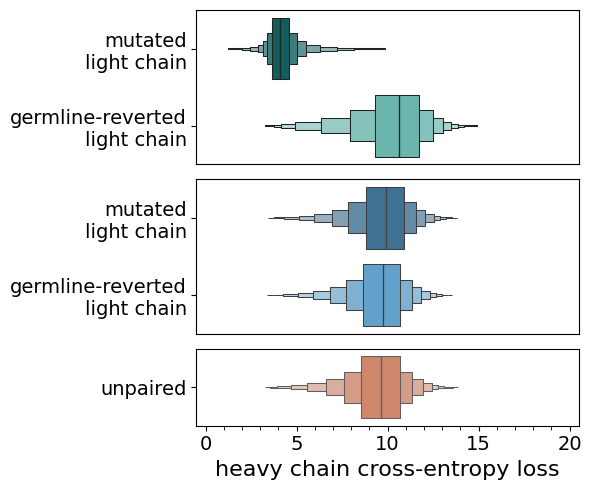

In [11]:
fig, axes = plt.subplots(3, 1, figsize=[6, 5], sharex=True, gridspec_kw={'height_ratios': [2,2,1]})

sns.boxenplot(
    data=paired, 
    x='loss', 
    y='label',
    ax=axes[0],
    palette=paired_colors,
    showfliers=False,
    k_depth='proportion',
)

sns.boxenplot(
    data=shuffled, 
    x='loss', 
    y='label',
    ax=axes[1],
    palette=shuffled_colors,
    showfliers=False,
    k_depth='proportion',

)

sns.boxenplot(
    data=unpaired, 
    x='loss', 
    y='label',
    ax=axes[2],
    palette=unpaired_color,
    showfliers=False,
    k_depth='proportion',
)


for i, ax in enumerate(axes.flat):
    ax.set_xlim([-0.5, 20.5])
    
    if i == 2:
        ax.set_xlabel('heavy chain cross-entropy loss', fontsize=16)
        ax.set_ylabel('', fontsize=0)
        
        ax.set_xticks(range(0, 21, 5))
        ax.set_xticks(range(0, 20), minor=True)
        
        ax.tick_params(axis='both', labelsize=14)
        ax.tick_params(axis='x', which='minor', length=3)

    else:
        ax.set_ylabel('', fontsize=0)
        ax.set_xlabel('', fontsize=0)
        ax.tick_params(axis='y', labelsize=14)
        ax.tick_params(axis='x', which='both', bottom=False)
    
plt.tight_layout()
# plt.savefig('./masked-heavy-chains_cel_all-lines.pdf')

## light chains

In [12]:
ldf = df[df['masked_chain'] == 'light']

In [13]:
lpaired = ldf[ldf['model'] == 'BALM-paired']
lshuffled = ldf[ldf['model'] == 'BALM-shuffled']
lunpaired = ldf[ldf['label'] == 'unpaired']

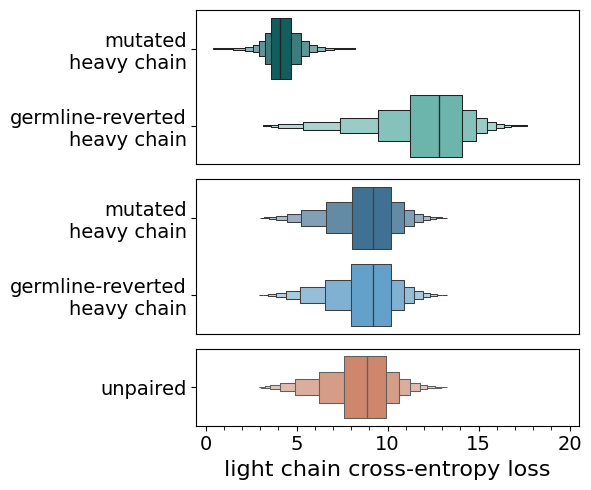

In [14]:
fig, axes = plt.subplots(3, 1, figsize=[6, 5], sharex=True, gridspec_kw={'height_ratios': [2,2,1]})

sns.boxenplot(
    data=lpaired, 
    x='loss', 
    y='label',
    ax=axes[0],
    palette=paired_colors,
    showfliers=False,
    k_depth='proportion',
)

sns.boxenplot(
    data=lshuffled, 
    x='loss', 
    y='label',
    ax=axes[1],
    palette=shuffled_colors,
    showfliers=False,
    k_depth='proportion',

)

sns.boxenplot(
    data=lunpaired, 
    x='loss', 
    y='label',
    ax=axes[2],
    palette=unpaired_color,
    showfliers=False,
    k_depth='proportion',
)


for i, ax in enumerate(axes.flat):
    ax.set_xlim([-0.5, 20.5])
    
    if i == 2:
        ax.set_xlabel('light chain cross-entropy loss', fontsize=16)
        ax.set_ylabel('', fontsize=0)
        
        ax.set_xticks(range(0, 21, 5))
        ax.set_xticks(range(0, 20), minor=True)
        
        ax.tick_params(axis='both', labelsize=14)
        ax.tick_params(axis='x', which='minor', length=3)

    else:
        ax.set_ylabel('', fontsize=0)
        ax.set_xlabel('', fontsize=0)
        ax.tick_params(axis='y', labelsize=14)
        ax.tick_params(axis='x', which='both', bottom=False)
    
plt.tight_layout()
# plt.savefig('./masked-light-chains_cel_all-lines.pdf')